In [1]:
import quickage
import warnings
warnings.filterwarnings("ignore")

import astropy.coordinates as astro_coord
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
#from astropy.constants im
%matplotlib inline
import pandas as pd

In [2]:
def draw_random_star(select_by= ['metallicity', 'velocity', 'jz'], dataset='galah', nsample=1,\
                     nsigma=1, norbits=50):
    
    #draw a random star
    df= quickage.load_schneider_samples().sample(n=nsample).reset_index(drop=True)
    
    res_df=[]
    for index, row in df.iterrows():
        try:
            dist= 1000/np.random.normal(row.plx,row.eplx,  1000)

            sourc={'ra': row.ra_gaia, \
                      'dec': row.de_gaia,
                      'pmra':( row.pmracosdec, np.abs(0.01*row.pmracosdec)),
                      'pmdec':(row.pmde,  np.abs(0.01*row.pmde)),
                      'distance': (np.nanmedian(dist), np.nanstd(dist)),
                      'rv':(row['rv'], 0.01*np.abs(row['rv']))}
            metal=(row['[Fe/H]'] , np.abs(0.01*row['[Fe/H]']))

            res=quickage.estimate_age(sourc, metal, nsigma=nsigma, data_set=dataset, select_by=select_by, 
                                      norbits= norbits)

            res_df.append({'real': row.age1,
                   'res_median':  res['median_age'],
                    'res_unc': list(res['std_age'])})
        except:
            pass
    return pd.DataFrame.from_records(res_df)
 

In [3]:
ross={'ra': 34.76599999999999,
              'dec':35.353388888888894,
              'pmra':(670.532, 0.042),
              'pmdec':( -427.412, 0.040),
              'distance':  (17.44, 0.012),
              'rv': (-27.80, 0.14)}

ross_metal= (-0.40, 0.12)

ross_age= (7.2, 3.7)

trapp={'ra': 346.6250957,
              'dec':-5.0428081,
              'pmra': (922.0 , 0.6),
              'pmdec': (-471.9, 0.9),
              'distance':  (12.49 , 0.18),
              'rv': (-51.688, 0.014)}
trapp_metal=(0.04 , 0.08)

trapp_age= (7.6, 2.2)

trapp_res=quickage.estimate_age(trapp, trapp_metal, nsigma=1, data_set='galah', \
                                select_by=['velocity', \
                                    'jz', 'metallicity'], norbits=200)

ross_res=quickage.estimate_age(ross, ross_metal, nsigma=3, data_set='galah',select_by=['velocity', \
                                    'jz', 'metallicity'],  norbits=200)

IsochronePotential
(200, 200)


100%|█████████████████████████████████████████| 200/200 [00:37<00:00,  5.35it/s]


0.0036137808100521144 0.003719535050182752
IsochronePotential
(200, 200)


100%|█████████████████████████████████████████| 200/200 [00:38<00:00,  5.15it/s]

0.00013114376271112252 1.2551616421828023e-05


In [4]:
#ross_res

[Text(0.5, 0, 'Lit. Age'), Text(0, 0.5, 'Est. Age')]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


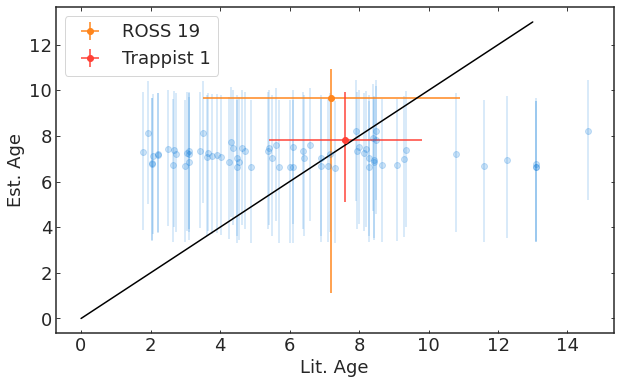

In [5]:
fig, ax=plt.subplots(figsize=(10, 6))

x= draw_random_star(select_by=['velocity'], nsample=100)

yerr=np.vstack(x['res_unc'].values).T
ax.errorbar(x['real'], x['res_median'], xerr=0., yerr=yerr,  fmt='o', c='#0074D9', ecolor = '#0074D9', alpha=0.2)


ax.errorbar(ross_age[0], ross_res['median_age'], xerr= ross_age[1], yerr= np.array([ross_res['std_age']]).T,\
            fmt='o', c='#FF851B', ecolor = '#FF851B', label='ROSS 19')

ax.errorbar(trapp_age[0], trapp_res['median_age'], xerr= trapp_age[1], yerr= np.array([trapp_res['std_age']]).T,\
            fmt='o', c='#FF4136', ecolor = '#FF4136', label='Trappist 1')

ax.legend()
ax.plot([0., 13], [0, 13], c='k')
ax.set(xlabel='Lit. Age', ylabel='Est. Age')

In [6]:
ross_res['median_age'] , ross_res['std_age'] 

(9.677657062293882, (8.54471543674862, 1.2648826553394557))

In [7]:
ross_age[0]

7.2

In [8]:
trapp_res['median_age'], trapp_res['std_age']

(7.814646987922288, (2.7227892812517416, 2.0966308122460635))

In [9]:
ross_res['median_age'], ross_res['std_age']

(9.677657062293882, (8.54471543674862, 1.2648826553394557))

[Text(0.5, 0, 'Lit. Age'), Text(0, 0.5, 'Est. Age')]

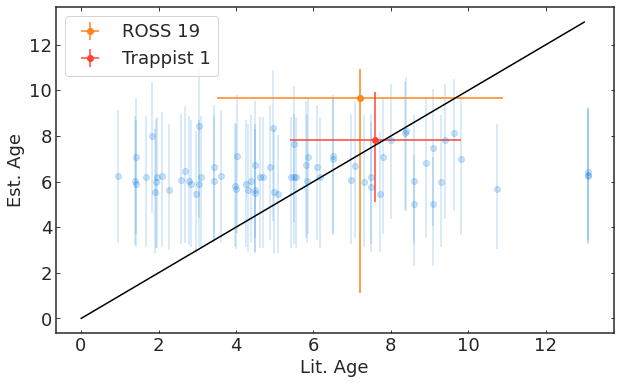

In [10]:
fig, ax=plt.subplots(figsize=(10, 6))

x= draw_random_star(select_by=['metallicity'], nsample=100, nsigma=3)

yerr=np.vstack(x['res_unc'].values).T
ax.errorbar(x['real'], x['res_median'], xerr=0., yerr=yerr,  fmt='o', c='#0074D9', ecolor = '#0074D9', alpha=0.2)


ax.errorbar(ross_age[0], ross_res['median_age'], xerr= ross_age[1], yerr= np.array([ross_res['std_age']]).T,\
            fmt='o', c='#FF851B', ecolor = '#FF851B', label='ROSS 19')

ax.errorbar(trapp_age[0], trapp_res['median_age'], xerr= trapp_age[1], yerr= np.array([trapp_res['std_age']]).T,\
            fmt='o', c='#FF4136', ecolor = '#FF4136', label='Trappist 1')

ax.legend()
ax.plot([0., 13], [0, 13], c='k')
ax.set(xlabel='Lit. Age', ylabel='Est. Age')

[Text(0.5, 0, 'Lit. Age'), Text(0, 0.5, 'Est. Age')]

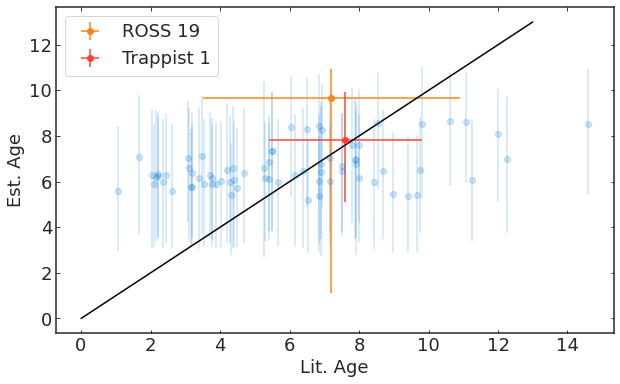

In [11]:
fig, ax=plt.subplots(figsize=(10, 6))

x= draw_random_star(select_by=['velocity', 'metallicity'], nsample=100, nsigma=3)

yerr=np.vstack(x['res_unc'].values).T
ax.errorbar(x['real'], x['res_median'], xerr=0., yerr=yerr,  fmt='o', c='#0074D9', ecolor = '#0074D9', alpha=0.2)


ax.errorbar(ross_age[0], ross_res['median_age'], xerr= ross_age[1], yerr= np.array([ross_res['std_age']]).T,\
            fmt='o', c='#FF851B', ecolor = '#FF851B', label='ROSS 19')

ax.errorbar(trapp_age[0], trapp_res['median_age'], xerr= trapp_age[1], yerr= np.array([trapp_res['std_age']]).T,\
            fmt='o', c='#FF4136', ecolor = '#FF4136', label='Trappist 1')

ax.legend()
ax.plot([0., 13], [0, 13], c='k')
ax.set(xlabel='Lit. Age', ylabel='Est. Age')

IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.36it/s]


0.002911309777274963 5.044718557828416e-05
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.12it/s]


0.0005541843299489363 1.0747782517727098e-05
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.38it/s]


0.000616961609273261 1.9792328208174895e-05
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:08<00:00,  5.61it/s]


0.2967984467176336 0.030912362726960997
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.24it/s]


0.0022706790172166563 0.00011165010476553313
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.41it/s]


0.00028046822864367157 6.178956049092807e-06
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:10<00:00,  4.99it/s]


0.00016937568576856093 3.245003096024443e-05
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.09it/s]


0.00013784179612938294 7.882273236963923e-06
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:08<00:00,  5.80it/s]


0.003972289994235019 0.00044463055344725705
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:08<00:00,  5.68it/s]


0.0009185007734099896 1.2717789047031254e-05
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:08<00:00,  5.72it/s]


0.00027185699528558144 2.1039176980017907e-05
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:08<00:00,  5.92it/s]


0.0007466233731963107 0.00020963409471831944
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.06it/s]


3.8618697127998715e-05 9.865962720297939e-05
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.24it/s]


0.0010339635197853952 2.4377627048829097e-05
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:08<00:00,  5.56it/s]


0.004833214265427767 0.00018639841564633113
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.47it/s]


0.00037690826300857804 0.0001255621399056738
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.49it/s]


1.9592052930463165e-05 4.87005844153584e-06
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.27it/s]


0.01331114652311903 0.0021449660183060523
IsochronePotential
(200, 50)


100%|███████████████████████████████████████████| 50/50 [00:10<00:00,  4.98it/s]


0.00012429013760312957 2.939408973997532e-06


[Text(0.5, 0, 'Lit. Age'), Text(0, 0.5, 'Est. Age')]

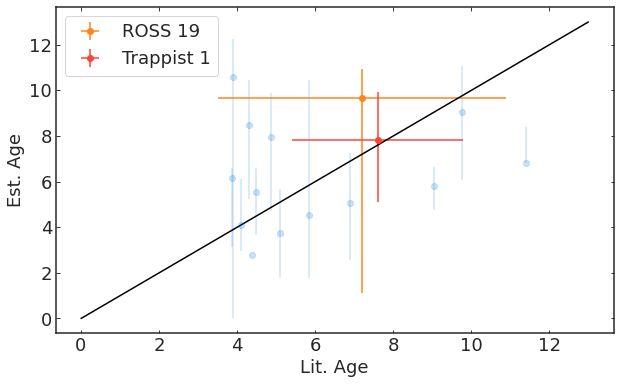

In [13]:
fig, ax=plt.subplots(figsize=(10, 6))

x= draw_random_star(select_by=['velocity', 'metallicity', 'jz'], dataset='galah', nsample=20, nsigma=2, 
                    norbits=50)

yerr=np.vstack(x['res_unc'].values).T
ax.errorbar(x['real'], x['res_median'], xerr=0., yerr=yerr,  fmt='o', c='#0074D9', ecolor = '#0074D9', alpha=0.2)


ax.errorbar(ross_age[0], ross_res['median_age'], xerr= ross_age[1], yerr= np.array([ross_res['std_age']]).T,\
            fmt='o', c='#FF851B', ecolor = '#FF851B', label='ROSS 19')

ax.errorbar(trapp_age[0], trapp_res['median_age'], xerr= trapp_age[1], yerr= np.array([trapp_res['std_age']]).T,\
            fmt='o', c='#FF4136', ecolor = '#FF4136', label='Trappist 1')

ax.legend()
ax.plot([0., 13], [0, 13], c='k')
ax.set(xlabel='Lit. Age', ylabel='Est. Age')